# Milestone 2 | Week 3-4 | Phase 1

## **1. Perkenalan & Pendahuluan**

**Nama** = Muhammad Ashar Ihsan

**Batch** = 035

**Dataset** = Dataset yang kita gunakan kali ini merupakan sebuah data yang berisi mengenai berbagai macam tipe diabetes serta mencakup berbagai atribut medis, genetik, dan gaya hidup yang penting untuk memahami faktor-faktor yang berkontribusi terhadap penyakit diabetes.
Informasi lengkap mengenai dataset dapat diakses melalui link [**Dataset**](https://www.kaggle.com/datasets/ankitbatra1210/diabetes-dataset/data) berikut.

**Objective** = Diabetes menjadi salah satu penyakit yang cukup sulit untuk dilihat ciri-cirinya. Apalagi di era modern ini, adanya fast foods membuat seseorang dengan umur yang muda saja juga dapat terkena diabetes. Maka dari itu, untuk mencegah hal ini terjadi diperlukan identifikasi lebih awal sehingga kita dapat melakukan penanganan yang lebih tepat.

- Jika seseorang termasuk ke dalam kondisi pradiabetic kita dapat memberikan pertolongan seperti edukasi terhadap ciri-ciri awal diabetes serta edukasi pencegahan agar kondisi tersebut dapat dikurangi.

- Jika seseorang termasuk ke dalam kondisi diabetes tertentu kita dapat memberikan pertolongan pertama seperti edukasi mengenai apa saja hal-hal yang harus dihindari untuk diabetes tersebut, dan juga pola makan seperti apa yang baik jika seseorang sudah terkena diabetes.

**Justifikasi** =
- https://rsud.tulungagung.go.id/kenali-bahaya-diabetes-bisa-menyerang-orang-dewasa-hingga-anak-anak/

- https://www.siloamhospitals.com/informasi-siloam/artikel/komplikasi-diabetes-melitus

- https://www.manulife.co.id/id/artikel/diabetes-usia-muda-semakin-sering-terjadi-apa-yang-bisa-anda-lakukan.html

- https://www.diabetes.org.uk/diabetes-the-basics/types-of-diabetes


Metrics yang akan digunakan untuk mengevaluasi model ini adalah F1-Score, penggunaan F1-score disini karena matrics tersebut mempertimbangkan keseimbangan antara precision dan recall. Dan juga, dalam konteks tipe diabetes ini, baik salah mendiagnosis seseorang sebagai diabetes (false positive) maupun gagal mendiagnosis seseorang yang sebenarnya diabetes (false negative) memiliki konsekuensi yang sama-sama sangat merugikan.


## **2. Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# algoritma
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC


## **3. Data Loading**

In [281]:
df_ori = pd.read_csv('diabetes_dataset00.csv')

df = df_ori.copy()

df = df.sample(n=10000, random_state=99)  # Mengambil 10000 sampel secara acak
df = df.reset_index(drop=True)           # Mereset index

df

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,29,36,32,Low,Healthy,...,78,No,Yes,Positive,3,Abnormal,53,Ketones Present,2645,Yes
1,Secondary Diabetes,Positive,Negative,Yes,Present,48,64,22,High,Unhealthy,...,75,No,Yes,Negative,2,Normal,57,Glucose Present,4302,Yes
2,MODY,Positive,Negative,Yes,Absent,22,21,28,High,Unhealthy,...,87,Yes,Yes,Negative,2,Normal,45,Normal,3892,No
3,Type 1 Diabetes,Negative,Positive,Yes,Absent,8,14,21,Moderate,Healthy,...,88,Yes,No,Negative,2,Abnormal,49,Protein Present,2773,Yes
4,Wolfram Syndrome,Positive,Negative,No,Absent,17,14,17,Moderate,Healthy,...,52,Yes,No,Negative,1,Abnormal,24,Normal,2121,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,Yes,Present,31,23,29,Moderate,Unhealthy,...,64,No,No,Negative,2,Normal,72,Glucose Present,2572,Yes
9996,Wolfram Syndrome,Positive,Negative,No,Absent,11,8,22,Low,Healthy,...,52,Yes,Yes,Negative,2,Abnormal,25,Normal,1961,No
9997,MODY,Negative,Positive,Yes,Present,11,29,24,Moderate,Healthy,...,78,No,No,Negative,2,Abnormal,46,Protein Present,2670,No
9998,Type 2 Diabetes,Positive,Positive,No,Absent,45,57,31,Moderate,Healthy,...,66,No,Yes,Positive,3,Normal,44,Protein Present,3121,No


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         10000 non-null  object
 1   Genetic Markers                10000 non-null  object
 2   Autoantibodies                 10000 non-null  object
 3   Family History                 10000 non-null  object
 4   Environmental Factors          10000 non-null  object
 5   Insulin Levels                 10000 non-null  int64 
 6   Age                            10000 non-null  int64 
 7   BMI                            10000 non-null  int64 
 8   Physical Activity              10000 non-null  object
 9   Dietary Habits                 10000 non-null  object
 10  Blood Pressure                 10000 non-null  int64 
 11  Cholesterol Levels             10000 non-null  int64 
 12  Waist Circumference            10000 non-null  int64 
 13  Bl

Insight:
- dataset memiliki 10000 rows dengan total 34 colomns
- kolom numeric sebanyak 13 columns dan untuk categoric 21 columns
- sekilas tidak ada missing value

In [283]:
df['Target'].unique()

array(['Steroid-Induced Diabetes', 'Secondary Diabetes', 'MODY',
       'Type 1 Diabetes', 'Wolfram Syndrome',
       'Type 3c Diabetes (Pancreatogenic Diabetes)',
       'Neonatal Diabetes Mellitus (NDM)', 'Gestational Diabetes',
       'Wolcott-Rallison Syndrome',
       'Cystic Fibrosis-Related Diabetes (CFRD)', 'Type 2 Diabetes',
       'Prediabetic', 'LADA'], dtype=object)

Untuk target kita memiliki 13 tipe diabetes berbeda.

In [284]:
df.duplicated().sum()

0

Terlihat diatas tidak ada rows yang terduplikat.

In [285]:
df.isnull().sum()

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neurological Assessm

Untuk missing value juga tidak terlihat adanya kolom yang miss value.

In [286]:
df['Target'].value_counts()

Target
Secondary Diabetes                            834
LADA                                          826
Wolcott-Rallison Syndrome                     793
MODY                                          787
Type 1 Diabetes                               771
Type 3c Diabetes (Pancreatogenic Diabetes)    770
Cystic Fibrosis-Related Diabetes (CFRD)       760
Type 2 Diabetes                               760
Prediabetic                                   758
Neonatal Diabetes Mellitus (NDM)              740
Wolfram Syndrome                              737
Steroid-Induced Diabetes                      732
Gestational Diabetes                          732
Name: count, dtype: int64

Diatas kita melihat distribusi dari target kita, yang mana sesuai yang terlihat diatas bahwa datanya cukup balance berkisar antara 732-834.

## **4. EDA**

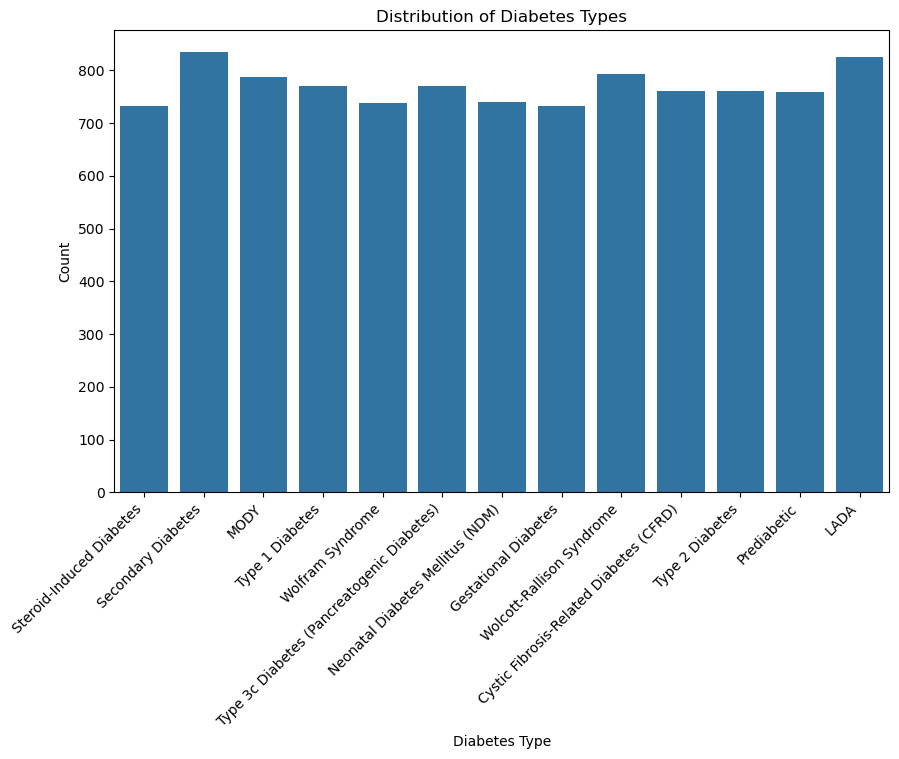

In [287]:
# visualisasi distribusi dari target (tipe diabetes)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Target')
plt.title('Distribution of Diabetes Types')
plt.xlabel('Diabetes Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Insight:
- diatas bisa dilihat bahwa value count dari masing-masing tipe diabetes memiliki tinggi bar yang cukup rata.

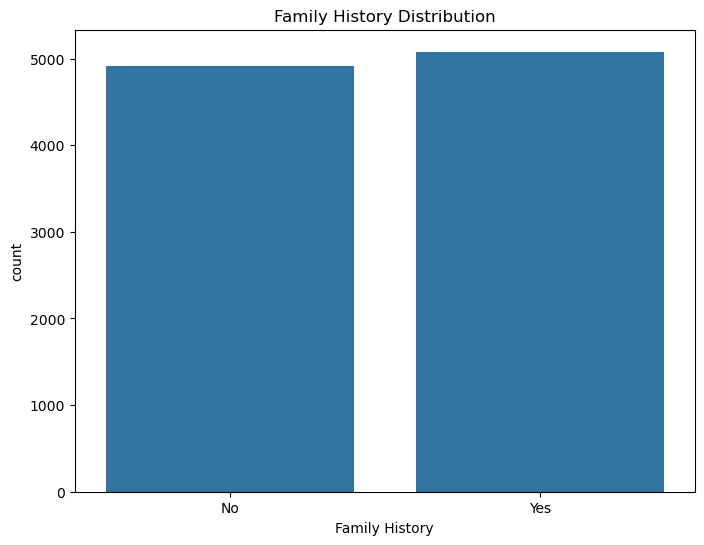

In [288]:
# distribusi pasien yang memiliki family history yang terkena diabetes atau tidak
plt.figure(figsize=(8, 6))
sns.countplot(x='Family History', data=df)
plt.title('Family History Distribution')
plt.show()

insight:
- terlihat diatas walaupun lebih banyak pasien yang memiliki family history, akan tetapi untuk jumlah dari pasien yang tidak dan ada family historynya tidak terlalu jauh.

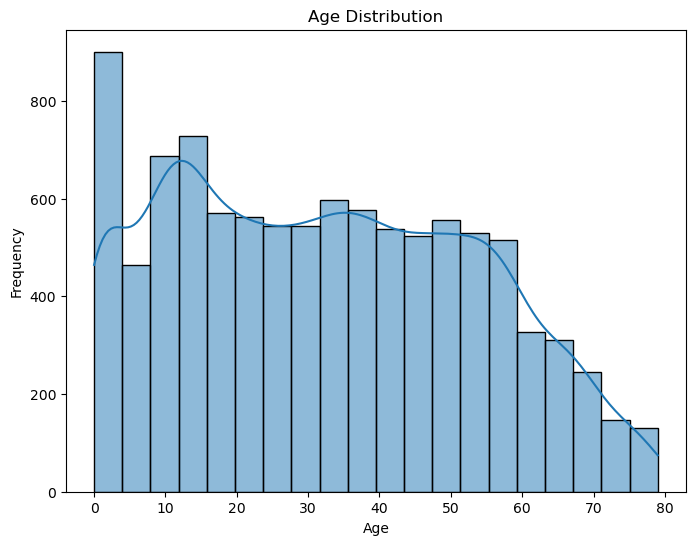

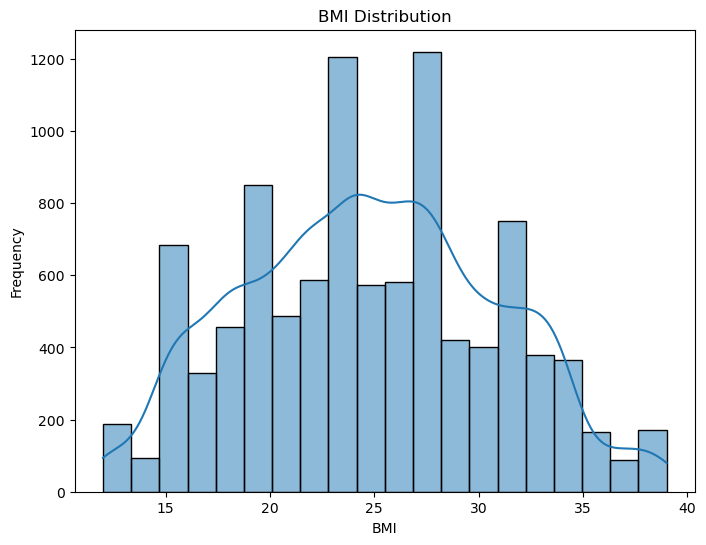

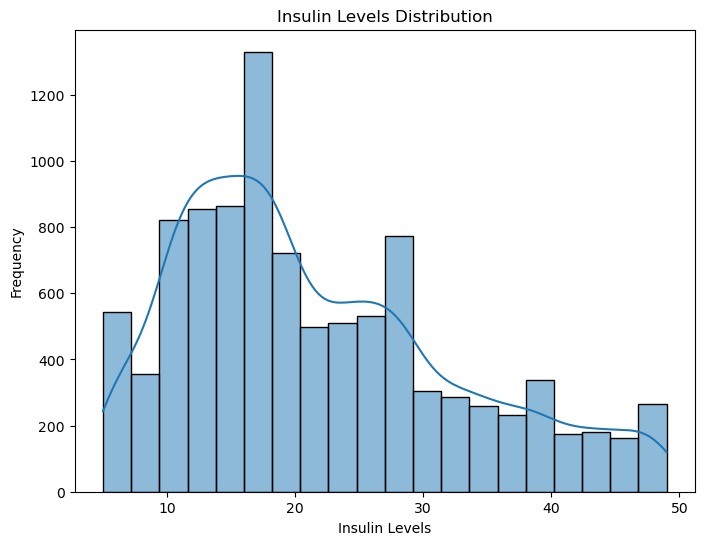

In [289]:
# distribusi age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# distribusi bmi
plt.figure(figsize=(8, 6))
sns.histplot(df['BMI'], bins=20, kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# distribusi level insulin
plt.figure(figsize=(8, 6))
sns.histplot(df['Insulin Levels'], bins=20, kde=True)
plt.title('Insulin Levels Distribution')
plt.xlabel('Insulin Levels')
plt.ylabel('Frequency')
plt.show()

insight:
- untuk distribusi age, grafik terlihat skewd dengan bentuk right-tail,
- untuk distribusi bmi disini terlihat terdistribusi cukup baik dimana bar berkumpul di tengah, Data terkonsentrasi di sekitar nilai rata-rata,
- insulin levels juga membentuk histogram yang skewd dimana berbentuk right-tailed juga.

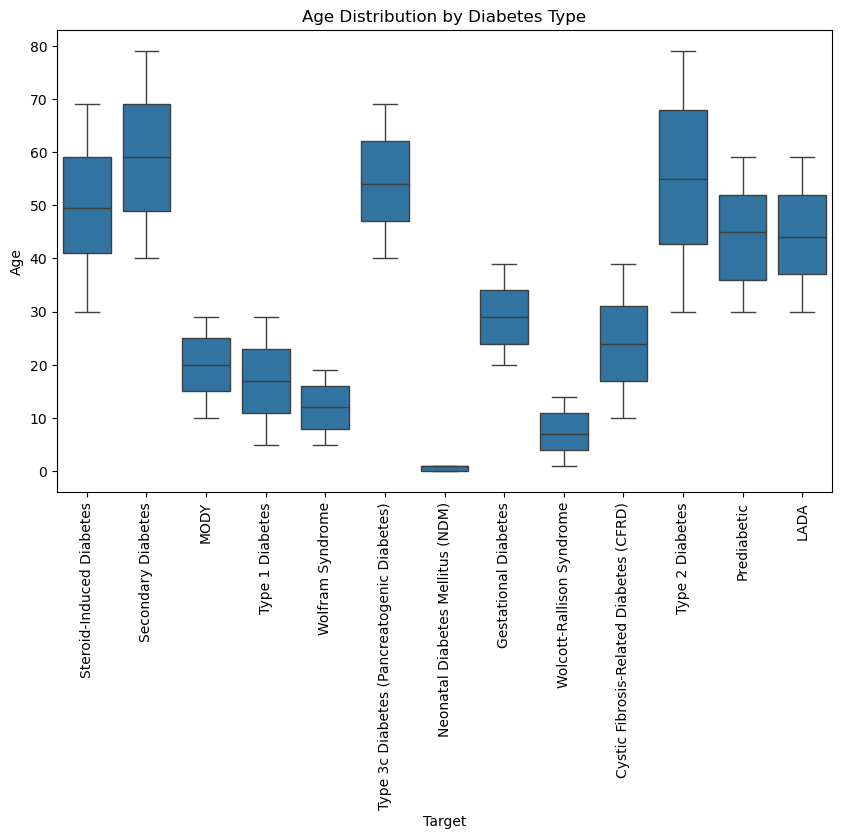

In [290]:
# distribusi umur berdasarkan tipe diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.xticks(rotation=90)
plt.title('Age Distribution by Diabetes Type')
plt.show()

insight:
- terlihat untuk diabetes tipe NDM berda di nilai 0, menunjukkan didataset yang kita pakai tidak ada pasien yang terkena diabetes NDM,
- diabetes tipe 2 memiliki rentang umur yang paling panjang sehikat 28 hingga 79 an,
- untuk wolcott-rallison syndrome hanya terjadi untuk pasien berumur 0 hingga 15 tahun,
- wolfram syndrom diabet juga memiliki rentang umur yang cukup muda yaitu sekitar 5 tahun hingga ke 30 tahun. 

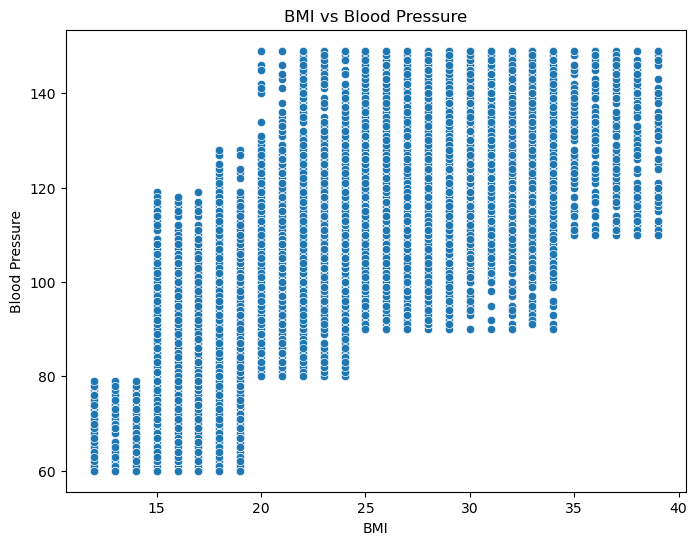

In [291]:
# Distribusi BMI dengan Tekanan darah pasien
plt.figure(figsize=(8, 6))
sns.scatterplot(x='BMI', y='Blood Pressure', data=df)
plt.title('BMI vs Blood Pressure')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.show()

insight:
- terlihat dari grafik, kolom BMI dan Blood Pressure memiliki korelasi dimana semakin tinggi BMI nya makan tekanan darah juga ikut naik.

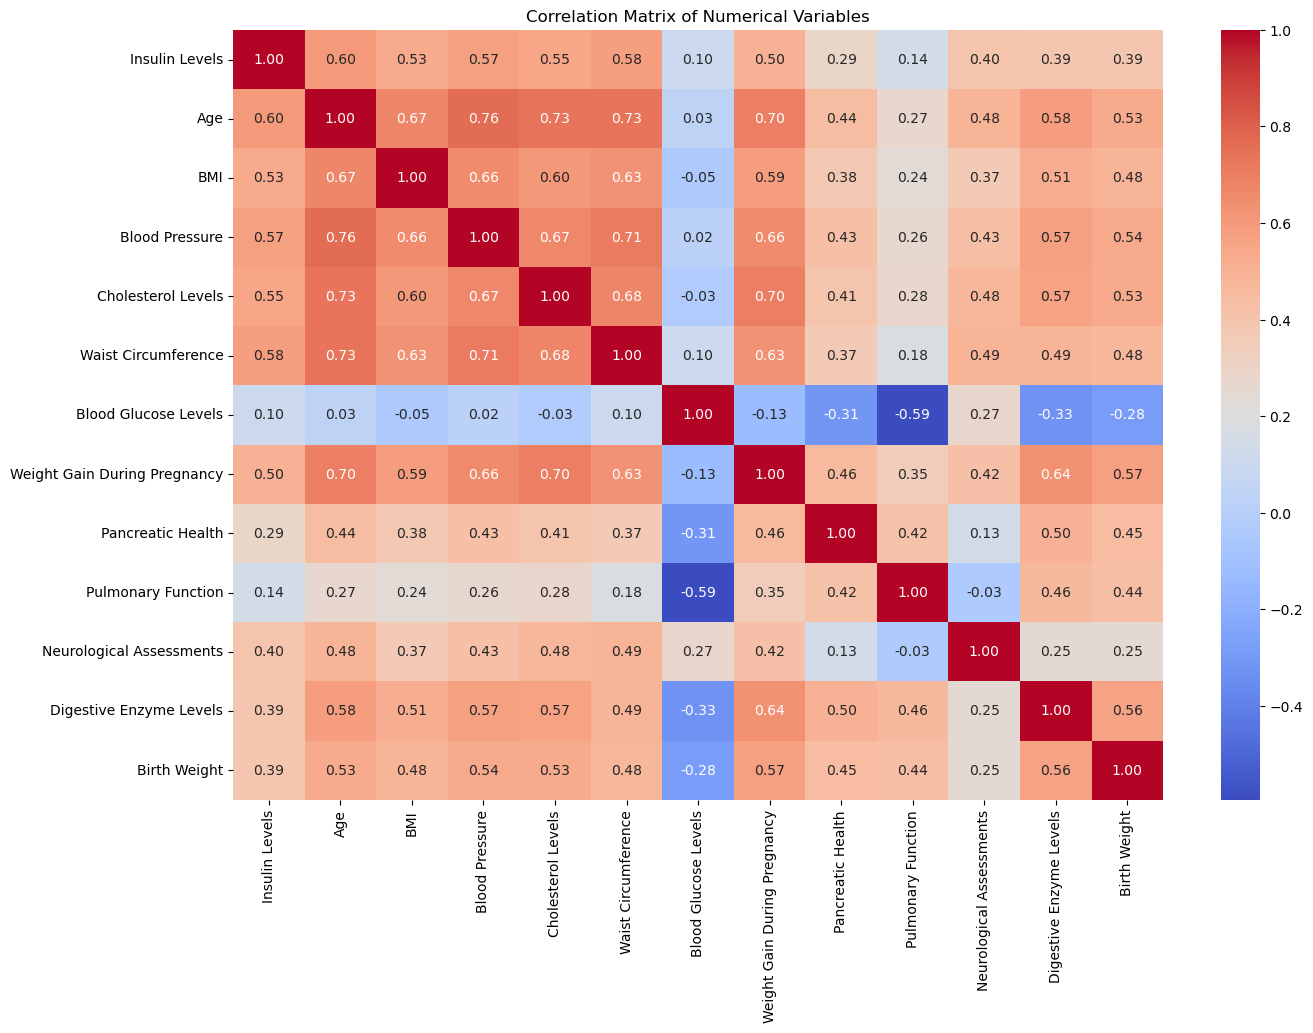

In [292]:
# melihat korelasi dari tiap kolom numeric
df_numeric = df.select_dtypes(include='number')

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

insight:

1. Hubungan Positif Kuat:

- Blood Pressure & Cholesterol Levels memiliki korelasi kuat dengan nilai korelasi 0.67. Ini mengindikasikan bahwa orang dengan tekanan darah tinggi cenderung memiliki kadar kolesterol yang tinggi juga.
- BMI & Waist Circumference (Lingkar Pinggang) memiliki korelasi yang sangat kuat (0.71). Ini wajar karena BMI dan lingkar pinggang biasanya meningkat bersamaan dengan peningkatan massa tubuh.
- BMI & Blood Pressure juga memiliki korelasi tinggi (0.65), sama seperti yang telah dijelaskan sebelum ini.
- Insulin Levels & Age memiliki korelasi 0.61, menunjukkan bahwa seiring bertambahnya usia, tingkat insulin cenderung meningkat.
- Cholesterol Levels & Age juga menunjukkan korelasi  (0.73), mengindikasikan bahwa kadar kolesterol cenderung meningkat seiring bertambahnya usia.

2. Hubungan Negatif:

- Pulmonary Function (Fungsi Paru-paru) & Blood Glucose Levels memiliki korelasi negatif cukup kuat (-0.60), yang mungkin menunjukkan bahwa peningkatan kadar gula darah dikaitkan dengan penurunan fungsi paru-paru.
- Pancreatic Health (Kesehatan Pankreas) & Blood Glucose Levels juga memiliki korelasi negatif (-0.31), yang wajar karena kesehatan pankreas berperan dalam pengaturan kadar gula darah.

3. Hubungan Lemah:

- Blood Glucose Levels memiliki korelasi yang lemah dengan sebagian besar variabel lain, kecuali dengan Pancreatic Health dan Pulmonary Function.
- Pulmonary Function dan Neurological Assessments terlihat tidak memiliki korelasi yang signifikan dengan banyak variabel lain, kecuali beberapa hubungan negatif dan positif yang kecil.

In [293]:
# cek apakah kolom categoric ada yang memiliki cardinality tinggi
pd.set_option('display.max_colwidth', None)

kolom_cat_cek = list(df.select_dtypes(include='object').columns)

listItem = []
for col in kolom_cat_cek:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique,nilai unique
0,Target,13,"[Steroid-Induced Diabetes, Secondary Diabetes, MODY, Type 1 Diabetes, Wolfram Syndrome, Type 3c Diabetes (Pancreatogenic Diabetes), Neonatal Diabetes Mellitus (NDM), Gestational Diabetes, Wolcott-Rallison Syndrome, Cystic Fibrosis-Related Diabetes (CFRD), Type 2 Diabetes, Prediabetic, LADA]"
1,Genetic Markers,2,"[Positive, Negative]"
2,Autoantibodies,2,"[Negative, Positive]"
3,Family History,2,"[No, Yes]"
4,Environmental Factors,2,"[Present, Absent]"
5,Physical Activity,3,"[Low, High, Moderate]"
6,Dietary Habits,2,"[Healthy, Unhealthy]"
7,Ethnicity,2,"[High Risk, Low Risk]"
8,Socioeconomic Factors,3,"[High, Medium, Low]"
9,Smoking Status,2,"[Smoker, Non-Smoker]"


Terlihat diatas untuk kolom fitur tidak ada yang memiliki cardinality tinggi, hanya saja target kita yang memiliki banyak unique value.

## **5. Feature Engineering**

### **5.1 Feature Selection**

Pada fitur select kita akan mengambil beberapa kolom yang sekiranya penting, dimana kolom kolom ini didapatkan dari EDA dan juga hubungan mereka di sitasi kehidupan nyata.

In [294]:
df

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,29,36,32,Low,Healthy,...,78,No,Yes,Positive,3,Abnormal,53,Ketones Present,2645,Yes
1,Secondary Diabetes,Positive,Negative,Yes,Present,48,64,22,High,Unhealthy,...,75,No,Yes,Negative,2,Normal,57,Glucose Present,4302,Yes
2,MODY,Positive,Negative,Yes,Absent,22,21,28,High,Unhealthy,...,87,Yes,Yes,Negative,2,Normal,45,Normal,3892,No
3,Type 1 Diabetes,Negative,Positive,Yes,Absent,8,14,21,Moderate,Healthy,...,88,Yes,No,Negative,2,Abnormal,49,Protein Present,2773,Yes
4,Wolfram Syndrome,Positive,Negative,No,Absent,17,14,17,Moderate,Healthy,...,52,Yes,No,Negative,1,Abnormal,24,Normal,2121,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,Yes,Present,31,23,29,Moderate,Unhealthy,...,64,No,No,Negative,2,Normal,72,Glucose Present,2572,Yes
9996,Wolfram Syndrome,Positive,Negative,No,Absent,11,8,22,Low,Healthy,...,52,Yes,Yes,Negative,2,Abnormal,25,Normal,1961,No
9997,MODY,Negative,Positive,Yes,Present,11,29,24,Moderate,Healthy,...,78,No,No,Negative,2,Abnormal,46,Protein Present,2670,No
9998,Type 2 Diabetes,Positive,Positive,No,Absent,45,57,31,Moderate,Healthy,...,66,No,Yes,Positive,3,Normal,44,Protein Present,3121,No


In [295]:
# memilih kolom yang ingin dipakai dan memasukkan ke variabel df
df = df[
    ['Target', 'Genetic Markers', 'Autoantibodies', 'Family History', 
     'Environmental Factors', 'Physical Activity', 'Dietary Habits', 
     'Smoking Status', 'Glucose Tolerance Test', 
     'History of PCOS', 'Genetic Testing', 
     'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms', 'Insulin Levels',
     'Age', 'BMI','Blood Pressure', 'Cholesterol Levels',
    'Blood Glucose Levels']
]

df

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Smoking Status,Glucose Tolerance Test,History of PCOS,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels
0,Steroid-Induced Diabetes,Positive,Negative,No,Present,Low,Healthy,Smoker,Abnormal,No,Positive,Abnormal,Ketones Present,Yes,29,36,32,115,221,134
1,Secondary Diabetes,Positive,Negative,Yes,Present,High,Unhealthy,Non-Smoker,Normal,No,Negative,Normal,Glucose Present,Yes,48,64,22,125,224,205
2,MODY,Positive,Negative,Yes,Absent,High,Unhealthy,Smoker,Normal,No,Negative,Normal,Normal,No,22,21,28,95,182,122
3,Type 1 Diabetes,Negative,Positive,Yes,Absent,Moderate,Healthy,Smoker,Abnormal,Yes,Negative,Abnormal,Protein Present,Yes,8,14,21,93,153,121
4,Wolfram Syndrome,Positive,Negative,No,Absent,Moderate,Healthy,Non-Smoker,Normal,Yes,Negative,Abnormal,Normal,No,17,14,17,92,173,233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cystic Fibrosis-Related Diabetes (CFRD),Positive,Negative,Yes,Present,Moderate,Unhealthy,Smoker,Normal,Yes,Negative,Normal,Glucose Present,Yes,31,23,29,96,163,131
9996,Wolfram Syndrome,Positive,Negative,No,Absent,Low,Healthy,Non-Smoker,Normal,No,Negative,Abnormal,Normal,No,11,8,22,104,164,288
9997,MODY,Negative,Positive,Yes,Present,Moderate,Healthy,Smoker,Normal,No,Negative,Abnormal,Protein Present,No,11,29,24,113,182,138
9998,Type 2 Diabetes,Positive,Positive,No,Absent,Moderate,Healthy,Non-Smoker,Normal,No,Positive,Normal,Protein Present,No,45,57,31,130,269,169


In [296]:
# function untuk mengkategorikan lagi target yang kita miliki

def target_category(target):
    if target in ['Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)']:
        return 1
    elif target in ['Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA']:
        return 2
    elif target in ['Type 2 Diabetes']:
        return 3
    elif target in ['Wolcott-Rallison Syndrome', 'Secondary Diabetes']:
        return 4
    else:
        return 5  # Mencakup target lainnya seperti Type 3c, Gestational, CFRD, MODY

Diatas merupakan cara saya untuk memperkecil nilai unique yang akan dicari oleh model nantinya, dimana saya membagi menjadi 5 kategori dari 13 tipe diabetes tadi.

**1. Neonatal Diabetes Mellitus (NDM) (Kategori 1)**

NDM adalah bentuk diabetes langka yang muncul pada bayi di bawah usia 6 bulan. Karena karakteristik dan penanganannya berbeda signifikan dari diabetes lainnya, NDM dikelompokkan sendiri. Target yang termasuk: 'Steroid-Induced Diabetes', 'Neonatal Diabetes Mellitus (NDM)'

Alasan:
- Neonatal Diabetes Mellitus (NDM): Diabetes langka yang didiagnosis pada bayi di bawah usia 6 bulan. source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5928785/
- Steroid-Induced Diabetes: Diabetes yang dipicu oleh penggunaan obat steroid, bisa muncul pada berbagai usia, termasuk bayi. Dikelompokkan di sini karena kemunculannya bisa menyerupai NDM dan membutuhkan penanganan khusus pada bayi. source: https://www.diabetes.org.uk/diabetes-the-basics/other-types-of-diabetes/steroid-induced-diabetes

**2. Diabetes Tipe 1 (Kategori 2)**

Diabetes tipe 1 umumnya didorong oleh faktor autoimun, di mana sistem kekebalan tubuh menyerang sel-sel penghasil insulin di pankreas. Kondisi-kondisi yang termasuk dalam kategori ini memiliki mekanisme dasar yang serupa. Target yang termasuk: 'Prediabetic', 'Type 1 Diabetes', 'Wolfram Syndrome', 'LADA' 

Alasan:
- Prediabetic: Merupakan kondisi awal sebelum diabetes tipe 1 berkembang sepenuhnya. source: https://www.siloamhospitals.com/informasi-siloam/artikel/apa-itu-prediabetes
- Type 1 Diabetes: Diabetes tipe 1 klasik. source: https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/symptoms-causes/syc-20353011
- Wolfram Syndrome: Kondisi genetik langka yang sering disertai diabetes tipe 1. source: https://rarediseases.org/rare-diseases/wolfram-syndrome/
- LADA (Latent Autoimmune Diabetes in Adults): Bentuk diabetes tipe 1 yang berkembang lambat pada orang dewasa. source: https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/expert-answers/lada-diabetes/faq-20057880#:~:text=Latent%20autoimmune%20diabetes%20in%20adults%20(LADA)%20is%20a%20type%20of,damaging%20cells%20in%20the%20pancreas.

**3. Diabetes Tipe 2 (Kategori 3)**

Diabetes tipe 2 terutama disebabkan oleh resistensi insulin, di mana tubuh tidak dapat menggunakan insulin secara efektif. Ini berbeda secara fundamental dari diabetes tipe 1. Target yang termasuk: 'Type 2 Diabetes' source: https://www.siloamhospitals.com/informasi-siloam/artikel/diabetes-tipe-2

**4. Diabetes Sekunder (Kategori 4)**

Diabetes sekunder disebabkan oleh kondisi atau faktor lain, seperti penyakit pankreas, penggunaan obat tertentu, atau kondisi genetik spesifik.
Target yang termasuk: 'Wolcott-Rallison Syndrome', 'Secondary Diabetes'

Alasan: 
- Wolcott-Rallison Syndrome: Kondisi genetik langka yang menyebabkan diabetes neonatal dan masalah skeletal. source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10594453/
- Secondary Diabetes: Diabetes yang disebabkan oleh faktor eksternal atau kondisi lain.

**5. Diabetes Lainnya (Kategori 5)**

Kategori ini mencakup berbagai jenis diabetes yang tidak mudah masuk ke dalam kategori lain. Masing-masing memiliki karakteristik unik dan mungkin memerlukan pendekatan pengobatan yang berbeda. Target yang termasuk: 'Type 3c Diabetes (Pancreatogenic Diabetes)', 'Gestational Diabetes', 'Cystic Fibrosis-Related Diabetes (CFRD)', 'MODY'

Alasan:
- Type 3c Diabetes: Diabetes yang disebabkan oleh kerusakan pankreas (misalnya, karena pankreatitis). source: https://my.clevelandclinic.org/health/diseases/24953-type-3c-diabetes
- Gestational Diabetes: Diabetes yang berkembang selama kehamilan. source: https://www.mayoclinic.org/diseases-conditions/gestational-diabetes/symptoms-causes/syc-20355339
- CFRD: Diabetes yang terkait dengan cystic fibrosis. source: https://www-cff-org.translate.goog/managing-cf/cystic-fibrosis-related-diabetes?_x_tr_sl=en&_x_tr_tl=id&_x_tr_hl=id&_x_tr_pto=tc
- MODY (Maturity-Onset Diabetes of the Young): Bentuk diabetes monogenik yang sering muncul pada usia muda. source: https://www.ncbi.nlm.nih.gov/books/NBK532900/#:~:text=Maturity-onset%20diabetes%20of%20the,been%20observed%20with%20sulfonylurea%20treatment.

In [297]:
# terapkan kategori target tadi kedalam kolom target
df['Kategori_Target'] = df['Target'].apply(target_category)

C:\Users\LENOVO LOQ\AppData\Local\Temp\ipykernel_19184\3637591064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kategori_Target'] = df['Target'].apply(target_category)


In [298]:
# drop kolom target yang awal
df = df.drop('Target', axis=1)

Karena kita telah memiliki kolom target yang baru, kita akan drop kolom target yang awal untuk mencegah model mengalami over-fitting.

In [299]:
df

,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Physical Activity,Dietary Habits,Smoking Status,Glucose Tolerance Test,History of PCOS,Genetic Testing,Liver Function Tests,Urine Test,Early Onset Symptoms,Insulin Levels,Age,BMI,Blood Pressure,Cholesterol Levels,Blood Glucose Levels,Kategori_Target
0,Positive,Negative,No,Present,Low,Healthy,Smoker,Abnormal,No,Positive,Abnormal,Ketones Present,Yes,29,36,32,115,221,134,1
1,Positive,Negative,Yes,Present,High,Unhealthy,Non-Smoker,Normal,No,Negative,Normal,Glucose Present,Yes,48,64,22,125,224,205,4
2,Positive,Negative,Yes,Absent,High,Unhealthy,Smoker,Normal,No,Negative,Normal,Normal,No,22,21,28,95,182,122,5
3,Negative,Positive,Yes,Absent,Moderate,Healthy,Smoker,Abnormal,Yes,Negative,Abnormal,Protein Present,Yes,8,14,21,93,153,121,2
4,Positive,Negative,No,Absent,Moderate,Healthy,Non-Smoker,Normal,Yes,Negative,Abnormal,Normal,No,17,14,17,92,173,233,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Positive,Negative,Yes,Present,Moderate,Unhealthy,Smoker,Normal,Yes,Negative,Normal,Glucose Present,Yes,31,23,29,96,163,131,5
9996,Positive,Negative,No,Absent,Low,Healthy,Non-Smoker,Normal,No,Negative,Abnormal,Normal,No,11,8,22,104,164,288,2
9997,Negative,Positive,Yes,Present,Moderate,Healthy,Smoker,Normal,No,Negative,Abnormal,Protein Present,No,11,29,24,113,182,138,5
9998,Positive,Positive,No,Absent,Moderate,Healthy,Non-Smoker,Normal,No,Positive,Normal,Protein Present,No,45,57,31,130,269,169,3


Diatas kita dataframe yang kita miliki telah mencakup 20 kolom yang akan kita gunakan untuk training model kita.

In [300]:
# cek distribusi kategori target 
df['Kategori_Target'].value_counts()

Kategori_Target
2    3092
5    3049
4    1627
1    1472
3     760
Name: count, dtype: int64

Diatas tidak lupa kita melihat kembali distribusi dari target baru kita, terlihat distrubusinya menjadi tidak balance sehingga perlu dilakukan data balancing. untuk itu, kita akan menggunakan metode smotenc yang akan kita masukkan kedalam pipeline kita nantinya.

### **5.2 Split Feature (X) dan Target (y)**

In [301]:
# membagi kolom fitur dan kolom target
X = df.drop('Kategori_Target', axis=1)
y = df['Kategori_Target']

print("fitur:", X.shape)
print("target:",y.shape)

fitur: (10000, 19)
target: (10000,)


### **5.3 Split Split Train dan Test**

In [302]:
# membagi fitur train, fitur test, target train, dan juga target test
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=99)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (7500, 19)
Test size  :  (2500, 19)


### **5.4 Split Numerical dan Categorical Columns**

In [303]:
# melakukan pembagina kolom numerik, kargorical ordinal, dan juga nominal.

# kolom numerik
num_cols = ['Insulin Levels','Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Blood Glucose Levels']

# kolom kategorik ordinal
cat_o_cols = [
    'Physical Activity', 
    'Urine Test'
]

# kolom kategorik nominal
cat_n_cols = [
    'Genetic Markers', 
    'Autoantibodies', 
    'Family History', 
    'Environmental Factors', 
    'Dietary Habits', 
    'Smoking Status', 
    'Glucose Tolerance Test', 
    'History of PCOS', 
    'Genetic Testing', 
    'Liver Function Tests', 
    'Early Onset Symptoms'
]

In [304]:
# memasukkan pembagian kolom tadi kedalam variabel train dan test.

X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

X_train_cat_o = X_train[cat_o_cols]
X_test_cat_o = X_test[cat_o_cols]

X_train_cat_n = X_train[cat_n_cols]
X_test_cat_n = X_test[cat_n_cols]

### **5.5 Outliers Check**

Sebelum kita masuk ke pipeline kita akan melakukan cek outliers dahulu untuk melihat apakah data kita memiliki outliers yang ekstrim.

In [305]:
#check distribution form skewness
listItem= []

for col in num_cols:
  listItem.append([col, round(X[col].skew(),1), np.where(
    (round(X[col].skew(),1) <= 0.5) & (round(X[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,Insulin Levels,0.7,skewed
1,Age,0.2,normal
2,BMI,0.1,normal
3,Blood Pressure,-0.4,normal
4,Cholesterol Levels,0.2,normal
5,Blood Glucose Levels,0.6,skewed


terlihat ada dua kolom yang ditribusi nya skewed, insulin levels dan juga blood glucose levels sama sama skewed akan tetapi masih terhitung sebagai moderately skewed.

In [306]:
# buat upper, lower boundries dan cek persentase outliersnya

column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

for row in range (0, len(skewness)):
  col = skewness['nama kolom'][row]

  #cek upper and lower boundary

  if skewness['distribution'][row] == 'skewed':
    IQR = X[col].quantile(0.75) - X[col].quantile(0.25)
    lower_boundary = X[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X[col].quantile(0.75) + (IQR * 3)
  else:
    lower_boundary = X[col].mean() - 3* X[col].std()
    upper_boundary = X[col].mean() + 3* X[col].std()

  #append ke list

  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X[X[col] > upper_boundary]) / len(X) * 100) + (len(X[X[col] < lower_boundary]) / len(X) * 100))
  percent_total_outlier.append(totout)

outliers = pd.DataFrame({
    'column': column,

    #round the value

    'upper_boundary': [round(upper_bound,2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound,2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier,2) for percent_total_outlier in percent_total_outlier]
})
outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Insulin Levels,73.00,-32.00,0.0
1,Age,95.35,-30.68,0.0
2,BMI,42.80,6.76,0.0
3,Blood Pressure,170.75,52.29,0.0
4,Cholesterol Levels,328.94,61.75,0.0
5,Blood Glucose Levels,417.00,-101.00,0.0


Setelah kita lihat juga diatas kolom insulin levels dan juga blood glucose level ternyata memiliki presentase outliers 0.

### **5.6 Missing Value Check**

Next kita setelah kita cek outliers, kita masuk ke cek missing value.

In [307]:
X_train.isnull().sum()

Genetic Markers           0
Autoantibodies            0
Family History            0
Environmental Factors     0
Physical Activity         0
Dietary Habits            0
Smoking Status            0
Glucose Tolerance Test    0
History of PCOS           0
Genetic Testing           0
Liver Function Tests      0
Urine Test                0
Early Onset Symptoms      0
Insulin Levels            0
Age                       0
BMI                       0
Blood Pressure            0
Cholesterol Levels        0
Blood Glucose Levels      0
dtype: int64

In [308]:
X_test.isnull().sum()

Genetic Markers           0
Autoantibodies            0
Family History            0
Environmental Factors     0
Physical Activity         0
Dietary Habits            0
Smoking Status            0
Glucose Tolerance Test    0
History of PCOS           0
Genetic Testing           0
Liver Function Tests      0
Urine Test                0
Early Onset Symptoms      0
Insulin Levels            0
Age                       0
BMI                       0
Blood Pressure            0
Cholesterol Levels        0
Blood Glucose Levels      0
dtype: int64

In [309]:
y_train.isnull().sum()

0

In [310]:
y_test.isnull().sum()

0

Dari 4 kali cek missing value diatas dapat ditarik kesimpulan bahwa dari x_train, x_test, y_train, dan juga y_test tidak ada yang missing value. Dengan begitu kita aman untuk lanjut ke membuat preprocessor.

### **5.7. Make Preprosessing Pipeline**

In [311]:
# buat pipeline satu-satu tiap jenis kolom
num_pipe = Pipeline([
     ('imputer', SimpleImputer(strategy='mean')),
     ('scaler', StandardScaler())
 ])

cat_o_pipe = Pipeline([
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('encoder', OrdinalEncoder())
 ])

cat_n_pipe = Pipeline([
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('encoder', OneHotEncoder(handle_unknown='ignore'))
 ])

# gabungkan pipelinenya
preprocessor = ColumnTransformer([
     ('num', num_pipe, num_cols),
     ('cat_ord', cat_o_pipe, cat_o_cols),
     ('cat_nom', cat_n_pipe, cat_n_cols)
 ])


Diatas kita telah membuat preprosessor pipeline, dimana kita telah memasukkan kolom numeric dan juga categoric yang sama sama sudah melalui proses scaling dan juga encoding.

## **6. Model Definition & Training**

Kita akan mencoba menggunakan 5 algoritma berbeda yaitu, Random Forest, Decision Tree, KNN, SVM, dan juga Logistic Regression untuk mencari mana yang paling bagus dari kelima model tersebut.

### **6.1 Model Random Forest**

In [312]:
# buat model untuk random forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote_nc', SMOTENC(categorical_features=[1, 2, 3, 4, 5], random_state=99)),
    ('rf', RandomForestClassifier(random_state=99))
])

# train model rf yang sudah dibuat
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Insulin Levels', 'Age',
                                                   'BMI', 'Blood Pressure',
                                                   'Cholesterol Levels',
                                                   'Blood Glucose Levels']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Physi...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genetic Markers',
                                                   'Autoantibodies',
                                                   'Family History',
                                                   'Environmental Factors',
                                                   'Dietary Habits',
                                                   'Smoking Status',
                                                   'Glucose Tolerance Test',
                                                   'History of PCOS',
                                                   'Genetic Testing',
                                                   'Liver Function Tests',
                                                   'Early Onset Symptoms'])])),
                ('smote_nc',
                 SMOTENC(categorical_features=[1, 2, 3, 4, 5],
                         random_state=99)),
                ('rf', RandomForestClassifier(random_state=99))])

### **6.2 Model Decision Tree**

In [313]:
# buat model untuk dt
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(random_state=99))
])

# train model dt yang sudah dibuat
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Insulin Levels', 'Age',
                                                   'BMI', 'Blood Pressure',
                                                   'Cholesterol Levels',
                                                   'Blood Glucose Levels']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Physi...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genetic Markers',
                                                   'Autoantibodies',
                                                   'Family History',
                                                   'Environmental Factors',
                                                   'Dietary Habits',
                                                   'Smoking Status',
                                                   'Glucose Tolerance Test',
                                                   'History of PCOS',
                                                   'Genetic Testing',
                                                   'Liver Function Tests',
                                                   'Early Onset Symptoms'])])),
                ('dt', DecisionTreeClassifier(random_state=99))])

### **6.3 Model KNN**

In [314]:
# buat model untuk knn
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])


# train model knn yang sudah dibuat
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Insulin Levels', 'Age',
                                                   'BMI', 'Blood Pressure',
                                                   'Cholesterol Levels',
                                                   'Blood Glucose Levels']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Physi...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genetic Markers',
                                                   'Autoantibodies',
                                                   'Family History',
                                                   'Environmental Factors',
                                                   'Dietary Habits',
                                                   'Smoking Status',
                                                   'Glucose Tolerance Test',
                                                   'History of PCOS',
                                                   'Genetic Testing',
                                                   'Liver Function Tests',
                                                   'Early Onset Symptoms'])])),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

### **6.4 Model SVM**

In [315]:
# buat model untuk SVM
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(kernel='linear', random_state=99))
])

# train model knn yang sudah dibuat
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Insulin Levels', 'Age',
                                                   'BMI', 'Blood Pressure',
                                                   'Cholesterol Levels',
                                                   'Blood Glucose Levels']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Physi...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genetic Markers',
                                                   'Autoantibodies',
                                                   'Family History',
                                                   'Environmental Factors',
                                                   'Dietary Habits',
                                                   'Smoking Status',
                                                   'Glucose Tolerance Test',
                                                   'History of PCOS',
                                                   'Genetic Testing',
                                                   'Liver Function Tests',
                                                   'Early Onset Symptoms'])])),
                ('svc', SVC(kernel='linear', random_state=99))])

### **6.5 Model Logistic Regression**

In [316]:
# buat model untuk Logistic Regression
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=99))
])

# train model knn yang sudah dibuat
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Insulin Levels', 'Age',
                                                   'BMI', 'Blood Pressure',
                                                   'Cholesterol Levels',
                                                   'Blood Glucose Levels']),
                                                 ('cat_ord',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Physi...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Genetic Markers',
                                                   'Autoantibodies',
                                                   'Family History',
                                                   'Environmental Factors',
                                                   'Dietary Habits',
                                                   'Smoking Status',
                                                   'Glucose Tolerance Test',
                                                   'History of PCOS',
                                                   'Genetic Testing',
                                                   'Liver Function Tests',
                                                   'Early Onset Symptoms'])])),
                ('logreg', LogisticRegression(random_state=99))])

## **7. Model Evaluation**

Masuk kepada model evaluasi dimana kita akan analisis model yang telah kita definisikan tadi untuk mencari mana yang memiliki performa terbaik.

### **7.1 Model Random Forest**

F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1090
           2       1.00      1.00      1.00      2341
           3       1.00      1.00      1.00       559
           4       1.00      1.00      1.00      1226
           5       1.00      1.00      1.00      2284

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500
 

Confusion Matrix      : 


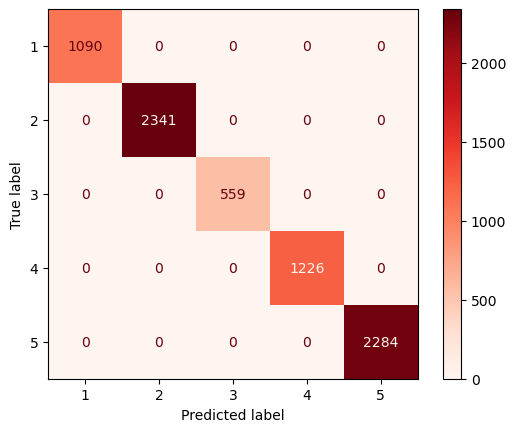

In [317]:
# Check Performance Model against Train-Set

y_pred_train_rf = rf_pipeline.predict(X_train)

# Added average='weighted' to f1_score
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_rf, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_train, y_train, cmap='Reds'))

Terlihat untuk model pertama model meraih skor sempurna yaitu 1 dimana ini akan kita lakukan cross validate untuk memvalidasi ulang apakah model benar-benar bisa memprediksi dengan sempurna.

#### **7.1.1 Cross Validation RF**

In [318]:
# Cross Validation using `cross_val_score`
f1_train_cross_val = cross_val_score(rf_pipeline,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1_weighted")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.77407538 0.77836789 0.77810854]
F1 Score - Mean - Cross Validation :  0.7768506048253325
F1 Score - Std - Cross Validation  :  0.001965234530483439
F1 Score - Range of Test-Set       :  0.774885370294849 - 0.778815839355816


Setelah di cross validate ternyata model memiliki rata-rata f1 skor sebesar 0.77 yang mana ini juga sudah cukup bagus.

F1 Score - Test Set   :  0.7922400702961293 

Classification Report : 
               precision    recall  f1-score   support

           1       0.87      0.68      0.76       382
           2       0.87      0.87      0.87       751
           3       0.50      0.89      0.64       201
           4       0.75      0.73      0.74       401
           5       0.83      0.77      0.80       765

    accuracy                           0.79      2500
   macro avg       0.77      0.79      0.76      2500
weighted avg       0.81      0.79      0.79      2500
 

Confusion Matrix      : 


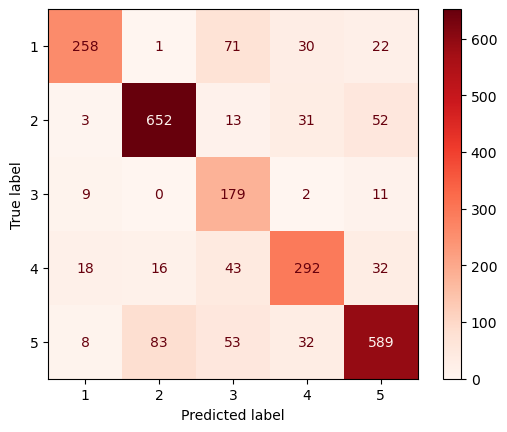

In [319]:
# Check Performance Model against Test-Set

y_pred_test_rf = rf_pipeline.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_rf, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_pipeline, X_test, y_test, cmap='Reds'))

Setelah kita kita cek dengan data test juga meraih nilai yang baik yaitu 0.79.

#### **7.1.2 Report**

In [320]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train, average='weighted'),
      'train - recall' : recall_score(y_train, y_pred_train, average='weighted'),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train, average='weighted'),
      'test - precision' : precision_score(y_test, y_pred_test, average='weighted'),
      'test - recall' : recall_score(y_test, y_pred_test, average='weighted'),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test, average='weighted'),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train, y_pred_train_rf, y_test, y_pred_test_rf, 'Random Forest')
pd.DataFrame(all_reports)

,Random Forest
train - precision,1.000000
train - recall,1.000000
train - accuracy,1.000000
train - f1_score,1.000000
test - precision,0.810039
test - recall,0.788000
test - accuracy_score,0.788000
test - f1_score,0.792240


Diatas kita masukkan hasil dari train dan test tadi kedalam sebuah list untuk nantinya kita bandingkan dengan model lain.

--------------------------

### **7.2 Model Decision Tree**

F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1090
           2       1.00      1.00      1.00      2341
           3       1.00      1.00      1.00       559
           4       1.00      1.00      1.00      1226
           5       1.00      1.00      1.00      2284

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500
 

Confusion Matrix      : 


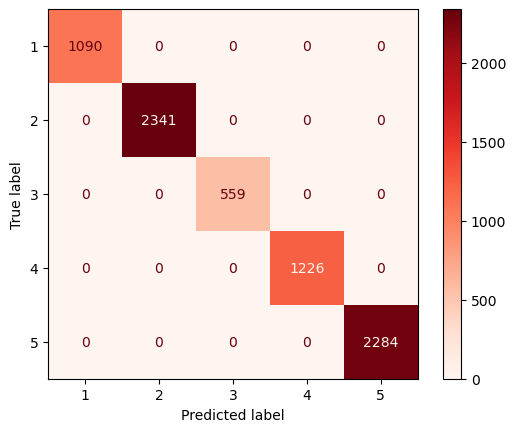

In [321]:
# Check Performance Model against Train-Set

y_pred_train_dt = dt_pipeline.predict(X_train)

# Added average='weighted' to f1_score
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_dt, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_train, y_train, cmap='Reds'))

Untuk model decision tree juga di train awal memiliki nilai sempurna, ini akan kita cek ulang di cross validation.

#### **7.2.1 Cross Validation DT**

In [322]:
# Cross Validation using `cross_val_score`

f1_train_crossval_dt = cross_val_score(dt_pipeline,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1_weighted")

print('F1 Score - All - Cross Validation  : ', f1_train_crossval_dt)
print('F1 Score - Mean - Cross Validation : ', f1_train_crossval_dt.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_crossval_dt.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_crossval_dt.mean()-f1_train_crossval_dt.std()) , '-', (f1_train_crossval_dt.mean()+f1_train_crossval_dt.std()))

F1 Score - All - Cross Validation  :  [0.76825826 0.75529691 0.77136101]
F1 Score - Mean - Cross Validation :  0.764972060571588
F1 Score - Std - Cross Validation  :  0.006957639769835841
F1 Score - Range of Test-Set       :  0.7580144208017521 - 0.7719297003414238


Ternyata setelah di cross-validate skor rata-ratanya 0.76, ini masih termasuk kepada model dengan skor yang cukup baik. akan tetapi, diatas kita lihat random forest memiliki rata-rata skor yang lebih tinggi.

F1 Score - Test Set   :  0.7843810263676226 

Classification Report : 
               precision    recall  f1-score   support

           1       0.72      0.76      0.74       382
           2       0.88      0.86      0.87       751
           3       0.54      0.54      0.54       201
           4       0.71      0.71      0.71       401
           5       0.83      0.82      0.83       765

    accuracy                           0.78      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.78      0.78      0.78      2500
 

Confusion Matrix      : 


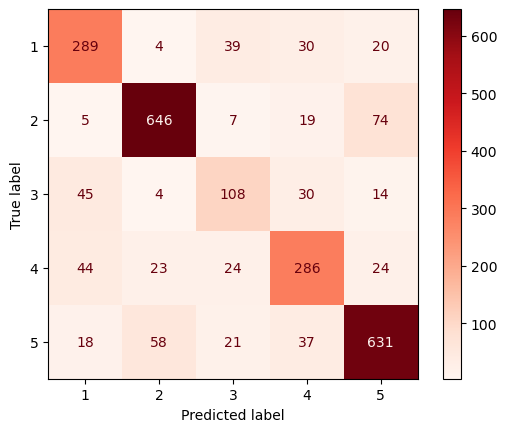

In [323]:
# Check Performance Model against Test-Set

y_pred_test_dt = dt_pipeline.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_dt, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_test, y_test, cmap='Reds'))

Di data test juga mendapatkan nilai skor yang baik yaitu 0.78.

#### **7.2.2 Report**

In [324]:
# Save Classification Report into a Dictionary

all_reports = performance_report(all_reports, y_train, y_pred_train_dt, y_test, y_pred_test_dt, 'Decision Tree')

df_reports = pd.DataFrame(all_reports)
df_reports

,Random Forest,Decision Tree
train - precision,1.000000,1.000000
train - recall,1.000000,1.000000
train - accuracy,1.000000,1.000000
train - f1_score,1.000000,1.000000
test - precision,0.810039,0.784959
test - recall,0.788000,0.784000
test - accuracy_score,0.788000,0.784000
test - f1_score,0.792240,0.784381


masukkan hasil prediksi tadi kedalam list report agar bisa kita bandingkan.

--------------------------------

### **7.3 Model KNN**

F1 Score - Train Set  :  0.7671357610818704 

Classification Report : 
               precision    recall  f1-score   support

           1       0.68      0.89      0.77      1090
           2       0.79      0.84      0.81      2341
           3       0.67      0.55      0.60       559
           4       0.82      0.60      0.69      1226
           5       0.81      0.78      0.80      2284

    accuracy                           0.77      7500
   macro avg       0.75      0.73      0.74      7500
weighted avg       0.78      0.77      0.77      7500
 

Confusion Matrix      : 


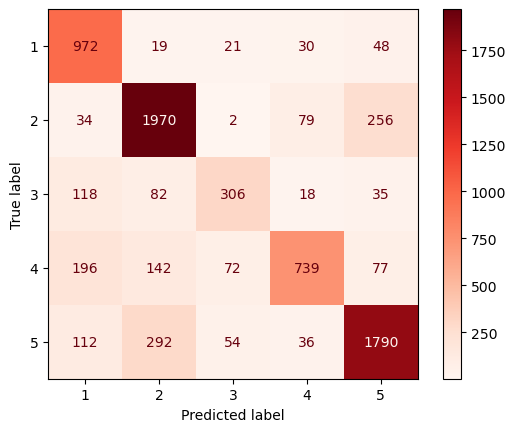

In [325]:
# Check Performance Model against Train-Set

y_pred_train_knn = knn_pipeline.predict(X_train)

# Added average='weighted' to f1_score
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_knn, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_train, y_train, cmap='Reds'))

Terlihat bahwa model knn mendapatkan score 0.76 pada awal train, next akan kita cross validate.

#### **7.3.1 Cross Validation KNN**

In [326]:
# Cross Validation using `cross_val_score`

f1_train_crossval_knn = cross_val_score(knn_pipeline,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1_weighted")

print('F1 Score - All - Cross Validation  : ', f1_train_crossval_knn)
print('F1 Score - Mean - Cross Validation : ', f1_train_crossval_knn.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_crossval_knn.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_crossval_knn.mean()-f1_train_crossval_knn.std()) , '-', (f1_train_crossval_knn.mean()+f1_train_crossval_knn.std()))

F1 Score - All - Cross Validation  :  [0.52861849 0.52490263 0.53026062]
F1 Score - Mean - Cross Validation :  0.5279272476664336
F1 Score - Std - Cross Validation  :  0.002241337463404659
F1 Score - Range of Test-Set       :  0.5256859102030289 - 0.5301685851298383


Setelah di cross validate ternyata model hanya memiliki skor rata-rata 0.52.

F1 Score - Test Set   :  0.559964436446536 

Classification Report : 
               precision    recall  f1-score   support

           1       0.52      0.65      0.58       382
           2       0.59      0.66      0.62       751
           3       0.45      0.28      0.34       201
           4       0.53      0.39      0.45       401
           5       0.60      0.61      0.60       765

    accuracy                           0.57      2500
   macro avg       0.54      0.52      0.52      2500
weighted avg       0.56      0.57      0.56      2500
 

Confusion Matrix      : 


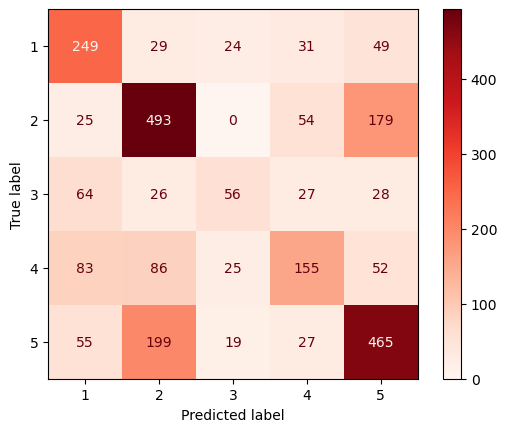

In [327]:
# Check Performance Model against Test-Set

y_pred_test_knn = knn_pipeline.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_knn, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test, y_test, cmap='Reds'))

Pada data test pun sama-sama hanya bisa memprediksi dengan skor 0.55.

#### **7.3.2 Report**

In [328]:
all_reports = performance_report(all_reports, y_train, y_pred_train_knn, y_test, y_pred_test_knn, 'KNN')

df_reports = pd.DataFrame(all_reports)
df_reports

,Random Forest,Decision Tree,KNN
train - precision,1.000000,1.000000,0.775276
train - recall,1.000000,1.000000,0.770267
train - accuracy,1.000000,1.000000,0.770267
train - f1_score,1.000000,1.000000,0.767136
test - precision,0.810039,0.784959,0.562668
test - recall,0.788000,0.784000,0.567200
test - accuracy_score,0.788000,0.784000,0.567200
test - f1_score,0.792240,0.784381,0.559964


Masukkan ke dalam report untuk dibandingkan.

---------------------------

### **7.4 Model SVM**

F1 Score - Train Set  :  0.5402182853403303 

Classification Report : 
               precision    recall  f1-score   support

           1       0.59      0.47      0.52      1090
           2       0.56      0.64      0.59      2341
           3       0.54      0.57      0.55       559
           4       0.36      0.25      0.30      1226
           5       0.59      0.65      0.62      2284

    accuracy                           0.55      7500
   macro avg       0.53      0.52      0.52      7500
weighted avg       0.54      0.55      0.54      7500
 

Confusion Matrix      : 


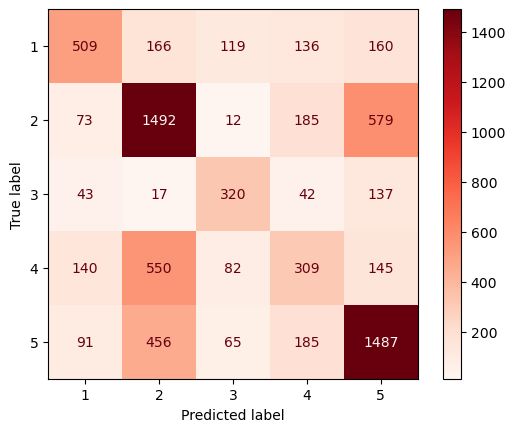

In [329]:
# Check Performance Model against Train-Set

y_pred_train_svm = svm_pipeline.predict(X_train)

# Added average='weighted' to f1_score
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_svm, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_pipeline, X_train, y_train, cmap='Reds'))

Sejauh ini svm yang paling rendah dengan skor awal 0.54.

#### **7.4.1 Cross Validation SVM**

In [330]:
# Cross Validation using `cross_val_score`

f1_train_crossval_svm = cross_val_score(svm_pipeline,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1_weighted")

print('F1 Score - All - Cross Validation  : ', f1_train_crossval_svm)
print('F1 Score - Mean - Cross Validation : ', f1_train_crossval_svm.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_crossval_svm.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_crossval_svm.mean()-f1_train_crossval_svm.std()) , '-', (f1_train_crossval_svm.mean()+f1_train_crossval_svm.std()))

F1 Score - All - Cross Validation  :  [0.52711597 0.53967507 0.53424196]
F1 Score - Mean - Cross Validation :  0.5336776678203431
F1 Score - Std - Cross Validation  :  0.005142732510997545
F1 Score - Range of Test-Set       :  0.5285349353093456 - 0.5388204003313406


Setelah dicross validate juga skor berada di rata-rata 0.53.

F1 Score - Test Set   :  0.5109584283396689 

Classification Report : 
               precision    recall  f1-score   support

           1       0.58      0.43      0.49       382
           2       0.50      0.61      0.55       751
           3       0.53      0.51      0.52       201
           4       0.34      0.25      0.29       401
           5       0.58      0.61      0.59       765

    accuracy                           0.52      2500
   macro avg       0.51      0.48      0.49      2500
weighted avg       0.51      0.52      0.51      2500
 

Confusion Matrix      : 


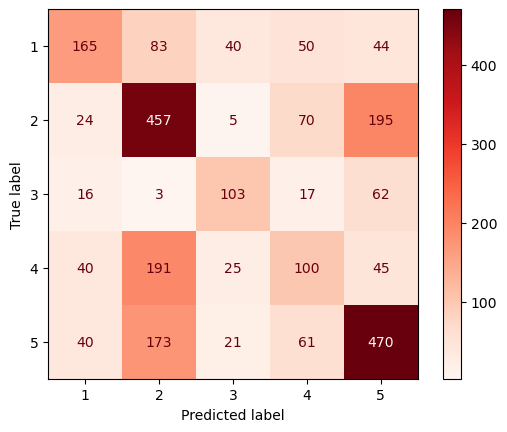

In [331]:
# Check Performance Model against Test-Set

y_pred_test_svm = svm_pipeline.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_svm, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_pipeline, X_test, y_test, cmap='Reds'))

Performa di data test juga sama sama hanya meraih skor 0.51.

#### **7.4.2 Report**

In [332]:
all_reports = performance_report(all_reports, y_train, y_pred_train_svm, y_test, y_pred_test_svm, 'SVM')

df_reports = pd.DataFrame(all_reports)
df_reports

,Random Forest,Decision Tree,KNN,SVM
train - precision,1.000000,1.000000,0.775276,0.539506
train - recall,1.000000,1.000000,0.770267,0.548933
train - accuracy,1.000000,1.000000,0.770267,0.548933
train - f1_score,1.000000,1.000000,0.767136,0.540218
test - precision,0.810039,0.784959,0.562668,0.512584
test - recall,0.788000,0.784000,0.567200,0.518000
test - accuracy_score,0.788000,0.784000,0.567200,0.518000
test - f1_score,0.792240,0.784381,0.559964,0.510958


Kita masukkan juga ke list report untuk dibandingkan keseluruhan nantinya.

------------------

### **7.5 Model Logreg**

F1 Score - Train Set  :  0.5033973181979278 

Classification Report : 
               precision    recall  f1-score   support

           1       0.53      0.43      0.48      1090
           2       0.50      0.55      0.52      2341
           3       0.51      0.44      0.47       559
           4       0.33      0.26      0.29      1226
           5       0.58      0.66      0.62      2284

    accuracy                           0.51      7500
   macro avg       0.49      0.47      0.48      7500
weighted avg       0.50      0.51      0.50      7500
 

Confusion Matrix      : 


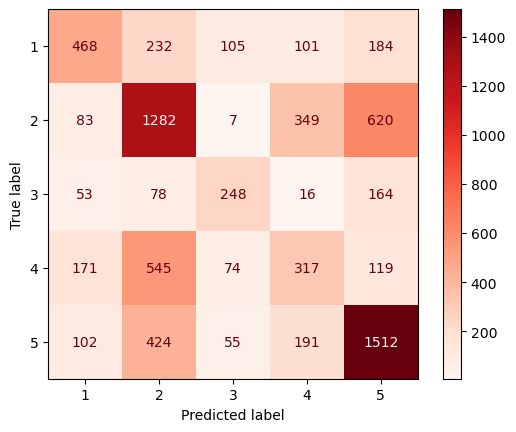

In [333]:
# Check Performance Model against Train-Set

y_pred_train_logreg = logreg_pipeline.predict(X_train)

# Added average='weighted' to f1_score
print('F1 Score - Train Set  : ', f1_score(y_train, y_pred_train_logreg, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_logreg), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_pipeline, X_train, y_train, cmap='Reds'))

Model logreg juga sama sama memiliki skor yang kurang baik yaitu 0.50. kita coba untuk cross validate.

#### **7.5.1 Cross Validation Logreg**

In [334]:
# Cross Validation using `cross_val_score`

f1_train_crossval_logreg = cross_val_score(logreg_pipeline,
                                     X_train,
                                     y_train,
                                     cv=3,
                                     scoring="f1_weighted")

print('F1 Score - All - Cross Validation  : ', f1_train_crossval_logreg)
print('F1 Score - Mean - Cross Validation : ', f1_train_crossval_logreg.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_crossval_logreg.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_crossval_logreg.mean()-f1_train_crossval_logreg.std()) , '-', (f1_train_crossval_logreg.mean()+f1_train_crossval_logreg.std()))

F1 Score - All - Cross Validation  :  [0.49061252 0.50136752 0.50012006]
F1 Score - Mean - Cross Validation :  0.49736670177993125
F1 Score - Std - Cross Validation  :  0.0048030023979048885
F1 Score - Range of Test-Set       :  0.4925636993820264 - 0.5021697041778361


Setelah dicross validate juga memiliki skor yang buruk yaitu 0.49.

F1 Score - Test Set   :  0.48248593330413425 

Classification Report : 
               precision    recall  f1-score   support

           1       0.53      0.38      0.44       382
           2       0.45      0.51      0.48       751
           3       0.51      0.43      0.47       201
           4       0.35      0.29      0.32       401
           5       0.57      0.63      0.59       765

    accuracy                           0.49      2500
   macro avg       0.48      0.45      0.46      2500
weighted avg       0.48      0.49      0.48      2500
 

Confusion Matrix      : 


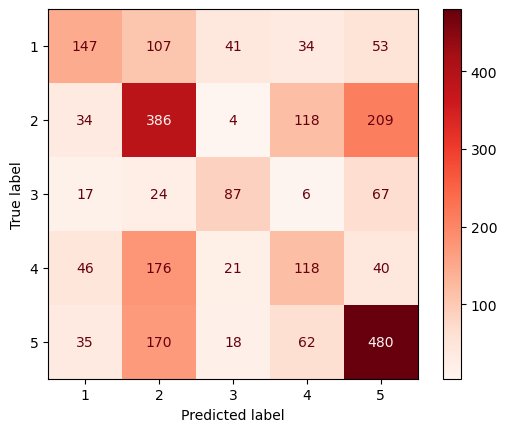

In [335]:
# Check Performance Model against Test-Set

y_pred_test_logreg = logreg_pipeline.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_logreg, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_logreg), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(logreg_pipeline, X_test, y_test, cmap='Reds'))

Data test juga sama, dimana hanya mendapatkan skor 0.48.

#### **7.5.2 Report**

In [336]:
all_reports = performance_report(all_reports, y_train, y_pred_train_logreg, y_test, y_pred_test_logreg, 'Logreg')

df_reports = pd.DataFrame(all_reports)
df_reports

,Random Forest,Decision Tree,KNN,SVM,Logreg
train - precision,1.000000,1.000000,0.775276,0.539506,0.501973
train - recall,1.000000,1.000000,0.770267,0.548933,0.510267
train - accuracy,1.000000,1.000000,0.770267,0.548933,0.510267
train - f1_score,1.000000,1.000000,0.767136,0.540218,0.503397
test - precision,0.810039,0.784959,0.562668,0.512584,0.484776
test - recall,0.788000,0.784000,0.567200,0.518000,0.487200
test - accuracy_score,0.788000,0.784000,0.567200,0.518000,0.487200
test - f1_score,0.792240,0.784381,0.559964,0.510958,0.482486


Terlihat di list report kita sudah memiliki semua data dari model yang kita buat.

-------------------------------

## **8. Model Analysis**

In [337]:
df_reports

,Random Forest,Decision Tree,KNN,SVM,Logreg
train - precision,1.000000,1.000000,0.775276,0.539506,0.501973
train - recall,1.000000,1.000000,0.770267,0.548933,0.510267
train - accuracy,1.000000,1.000000,0.770267,0.548933,0.510267
train - f1_score,1.000000,1.000000,0.767136,0.540218,0.503397
test - precision,0.810039,0.784959,0.562668,0.512584,0.484776
test - recall,0.788000,0.784000,0.567200,0.518000,0.487200
test - accuracy_score,0.788000,0.784000,0.567200,0.518000,0.487200
test - f1_score,0.792240,0.784381,0.559964,0.510958,0.482486


Dari 5 model yang telah kita lakukan prediksi sebelumnya, didapatkan bahwa model Random Forest memiliki nilai test f1 score yang paling tinggi dibandingkan dengan 4 model lainnya. Analisis mengenai model terbaik kita adalah sebagai berikut:

Kelebihan Model:
- Model Random Forest mencapai rata-rata F1 score 0.79 pada data test, menunjukkan performa yang baik secara umum dalam memprediksi berbagai kategori diabetes.
- Model menunjukkan performa yang kuat dalam memprediksi kategori diabetes 1, 2, 4, dan 5 dengan F1 score masing-masing 0.76, 0.87, 0.74 dan 0.80. Hal ini menunjukkan model mampu mempelajari pola yang membedakan kategori-kategori ini dengan baik.

Kelemahan Model:
- F1 score untuk kategori 3 relatif lebih rendah, yaitu 0.64. Ini menunjukkan bahwa model kesulitan dalam membedakan kategori diabetes 3 dengan kategori lainnya. Kemungkinan ada overlap karakteristik atau data yang kurang representatif untuk kategori ini. Kedepannya bisa kita lakukan Oversampling data kategori 3 untuk meningkatkan representasinya dan juga pengambilan data untuk memperbanyak fitur baru yang lebih relevan dengan kategori 3.

## **9. Hyperparameter Tuning**

Setelah kita menentukan model dengan f1 score terbaik, kita akan coba untuk melakukan tuning.

In [338]:
# menggunakan random_search dengan parameter dibawah.
random_search_params = {
    'rf__n_estimators': [200, 400, 800],
    'rf__max_depth': [10, 120, 230,],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

random_search_params

{'rf__n_estimators': [200, 400, 800],
 'rf__max_depth': [10, 120, 230],
 'rf__min_samples_split': [2, 5, 10],
 'rf__min_samples_leaf': [1, 2, 4]}

Diatas kita telah menentukan parameter apa saja yang akan kita lakukan kombinasi dengan menggunakan random_search.

In [339]:
# Train with Random Search
rf_randomcv = RandomizedSearchCV(estimator=rf_pipeline,
                                 param_distributions=random_search_params,
                                 n_iter=50,
                                 cv=3,
                                 random_state=99,
                                 n_jobs=-1,
                                 scoring='f1')

rf_randomcv.fit(X_train, y_train)

c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Insulin '
                                                                                'Levels',
                                                                                'Age',
                                                                                'BMI',
                                                                                'Blood '
                                                                                'Pressure',
                                                                                'Cholesterol '
                                                                                'Levels',
                                                                                'Blood '
                                                                                'Glucose '
                                                                                'Levels']),
                                                                              ('cat_ord',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_freque...
                                                                                'Tests',
                                                                                'Early '
                                                                                'Onset '
                                                                                'Symptoms'])])),
                                             ('smote_nc',
                                              SMOTENC(categorical_features=[1,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5],
                                                      random_state=99)),
                                             ('rf',
                                              RandomForestClassifier(random_state=99))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'rf__max_depth': [10, 120, 230],
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [2, 5, 10],
                                        'rf__n_estimators': [200, 400, 800]},
                   random_state=99, scoring='f1')

In [340]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'rf__n_estimators': 200,
 'rf__min_samples_split': 10,
 'rf__min_samples_leaf': 2,
 'rf__max_depth': 120}

Setelah kita mendapatkan best parameternya, terlihat n_estimator dan juga min_samples_split menyentuh batas paling bawah dan paling atas. Maka dari itu kita akan coba untuk memakai parameter yang ke 2 untuk melihat apakah ada parameter yang lebih baik.

In [341]:
random_search_params_2 = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [10, 120, 230,],
    'rf__min_samples_split': [10, 11, 12],
    'rf__min_samples_leaf': [1, 2, 4]
}

random_search_params_2

{'rf__n_estimators': [50, 100, 200],
 'rf__max_depth': [10, 120, 230],
 'rf__min_samples_split': [10, 11, 12],
 'rf__min_samples_leaf': [1, 2, 4]}

Sudah kita tentukan diatas n_estimator nya sekarang memiliki nilai 50 dan 100, dan juga min_samples_split nya ada 10 dan juga 11.

In [342]:
# Train with Random Search 2
rf_randomcv = RandomizedSearchCV(estimator=rf_pipeline,
                                 param_distributions=random_search_params_2,
                                 n_iter=50,
                                 cv=5,
                                 random_state=99,
                                 n_jobs=-1,
                                 scoring='f1')

rf_randomcv.fit(X_train, y_train)

c:\Users\LENOVO LOQ\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Insulin '
                                                                                'Levels',
                                                                                'Age',
                                                                                'BMI',
                                                                                'Blood '
                                                                                'Pressure',
                                                                                'Cholesterol '
                                                                                'Levels',
                                                                                'Blood '
                                                                                'Glucose '
                                                                                'Levels']),
                                                                              ('cat_ord',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_freque...
                                                                                'Tests',
                                                                                'Early '
                                                                                'Onset '
                                                                                'Symptoms'])])),
                                             ('smote_nc',
                                              SMOTENC(categorical_features=[1,
                                                                            2,
                                                                            3,
                                                                            4,
                                                                            5],
                                                      random_state=99)),
                                             ('rf',
                                              RandomForestClassifier(random_state=99))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'rf__max_depth': [10, 120, 230],
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [10, 11, 12],
                                        'rf__n_estimators': [50, 100, 200]},
                   random_state=99, scoring='f1')

In [343]:
rf_randomcv.best_params_

{'rf__n_estimators': 50,
 'rf__min_samples_split': 12,
 'rf__min_samples_leaf': 2,
 'rf__max_depth': 120}

Ternyata untuk min_samples_split 12 sudah menjadi parameter terbaiknya, sedangkan n_estimator bisa lebih ke bawah lagi. Akan tetapi, kita telah mendapatkan 3 dari 4 best estimator nya sehingga akan kita pakai untuk model final kita.

In [344]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_

Setelah mendifinisikan best model kita, dibawah kita akan test ulang apakah ada perubahan score model sebelum dan sesudah di tuning.

F1 Score - Test Set   :  0.7957945580306603 

Classification Report : 
               precision    recall  f1-score   support

           1       0.92      0.68      0.78       382
           2       0.88      0.85      0.86       751
           3       0.47      0.94      0.63       201
           4       0.75      0.74      0.75       401
           5       0.84      0.77      0.81       765

    accuracy                           0.79      2500
   macro avg       0.77      0.80      0.77      2500
weighted avg       0.82      0.79      0.80      2500
 

Confusion Matrix      : 


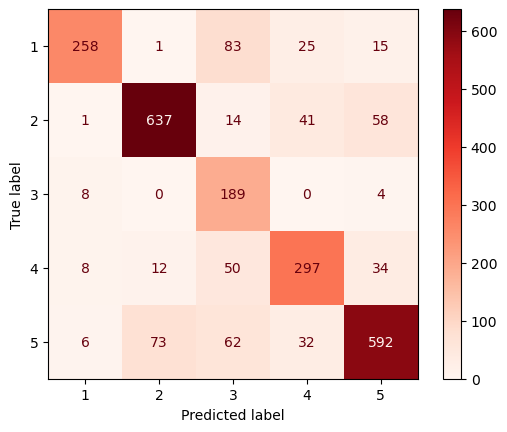

In [345]:
# Check Performance Model against Test-Set

y_pred_test_randomcv = rf_randomcv_best.predict(X_test)

print('F1 Score - Test Set   : ', f1_score(y_test, y_pred_test_randomcv, average='weighted'), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_randomcv), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test, y_test, cmap='Reds'))

In [346]:
all_reports = performance_report(all_reports, y_train, y_pred_train_rf, y_test, y_pred_test_randomcv, 'Grid Search(RF)')
pd.DataFrame(all_reports)

,Random Forest,Decision Tree,KNN,SVM,Logreg,Grid Search(RF)
train - precision,1.000000,1.000000,0.775276,0.539506,0.501973,1.000000
train - recall,1.000000,1.000000,0.770267,0.548933,0.510267,1.000000
train - accuracy,1.000000,1.000000,0.770267,0.548933,0.510267,1.000000
train - f1_score,1.000000,1.000000,0.767136,0.540218,0.503397,1.000000
test - precision,0.810039,0.784959,0.562668,0.512584,0.484776,0.821430
test - recall,0.788000,0.784000,0.567200,0.518000,0.487200,0.789200
test - accuracy_score,0.788000,0.784000,0.567200,0.518000,0.487200,0.789200
test - f1_score,0.792240,0.784381,0.559964,0.510958,0.482486,0.795795


Setelah kita masukkan di tabel report, terlihat sekilas tidak ada perubahan atau perubahan terjadi dengan nilai yang sangat kecil antara model random forest yang sebelum di tuning dan juga setelah dituning. hal ini masih memerlukan analisis yang lebih dalam lagi mengapa tidak terjadi perubahan. kemungkinan bisa saja dengan pencarian parameter yang lebih baik dan juga step by step feature engineering yang lebih ditingkatkan.

-------------

## **10. Model Saving**

Setelah kita mendapatkan model terbaik kita, makan akan kita save untuk nantinya kita test di model inference.

In [347]:
# Simpan model terbaik
with open('model_terbaik.pkl', 'wb') as file_1:
    pickle.dump(rf_randomcv_best, file_1)

## **11. Model Inference**

Model inference akan dilakukan di notebook berbeda, dibawah ini merupakan data yang akan kita pakai dalam model inference kita nanti.

In [352]:
# ambil sample data dari dataset awal kita dan buat dalam bentuk dictionary
sample_data = df_ori.sample(n=2, random_state=99).to_dict(orient='records')

sample_data

[{'Target': 'Steroid-Induced Diabetes',
  'Genetic Markers': 'Positive',
  'Autoantibodies': 'Negative',
  'Family History': 'No',
  'Environmental Factors': 'Present',
  'Insulin Levels': 29,
  'Age': 36,
  'BMI': 32,
  'Physical Activity': 'Low',
  'Dietary Habits': 'Healthy',
  'Blood Pressure': 115,
  'Cholesterol Levels': 221,
  'Waist Circumference': 36,
  'Blood Glucose Levels': 134,
  'Ethnicity': 'High Risk',
  'Socioeconomic Factors': 'High',
  'Smoking Status': 'Smoker',
  'Alcohol Consumption': 'Moderate',
  'Glucose Tolerance Test': 'Abnormal',
  'History of PCOS': 'No',
  'Previous Gestational Diabetes': 'No',
  'Pregnancy History': 'Normal',
  'Weight Gain During Pregnancy': 18,
  'Pancreatic Health': 73,
  'Pulmonary Function': 78,
  'Cystic Fibrosis Diagnosis': 'No',
  'Steroid Use History': 'Yes',
  'Genetic Testing': 'Positive',
  'Neurological Assessments': 3,
  'Liver Function Tests': 'Abnormal',
  'Digestive Enzyme Levels': 53,
  'Urine Test': 'Ketones Present',
 

## **12. Kesimpulan & Jawaban Conceptuals Problem**

**1. Conceptuals Problem**

Saya akan mencoba untuk menjawab consceptuals problem yang ada yaitu mengenai bagging, Random Forest, dan juga Cross Validation sebagai berikut:

- Jadi yang pertama bagging adalah salah satu cara untuk mengatasi masalah overfitting dalam model. Overfitting terjadi ketika model terlalu kompleks dan mempelajari noise dalam data training, sehingga kurang mampu menggeneralisasi dengan baik pada data baru atau data test nya. Untuk cara kerjanya sendiri, Bagging mengurangi variance dari model dengan menggabungkan prediksi dari beberapa model yang dilatih pada subset data yang berbeda. Dengan demikian, diharapkan model yang dihasilkan lebih stabil dan akurat. Sederhananya, misal kita memiliki 1000 data dan ingin melatih 10 model. Bagging akan membuat 10 subset data, masing-masing berisi 1000 data yang diambil secara acak dengan pengembalian dari data asli. Kemudian, 10 model dilatih pada 10 subset data tersebut. Setiap model memberikan prediksinya dan prediksi akhir diambil berdasarkan voting atau rata-rata dari 10 prediksi tersebut. 

- Disini karena model terbaik kita yaitu Random Forest, saya akan memberikan saja perbandingan antara model terbaik kita dengan model yang tidak kita pilih. Jadi, untuk cara kerja random forest dengan knn perbedaannya ada di random forest membangun banyak decision tree dan menggabungkan prediksinya, sedangkan KNN mencari data terdekat untuk menentukan kelas. selanjutnya, untuk decision tree Random Forest adalah ensemble dari banyak decision tree yang beragam, sedangkan Decision Tree tunggal rentan overfitting. next, Random Forest fokus pada memisahkan kelas dengan hyperplane berdasarkan kepentingan fiturnya, sedangkan SVM mencari hyperplane optimal untuk memaksimalkan margin. dan terakhir Random Forest menggunakan decision tree untuk membuat prediksi probabilitas, sedangkan Logistic Regression menggunakan fungsi yang bertugas untuk mengubah hasil perhitungan model (yang bisa berupa angka berapa pun) menjadi probabilitas antara 0 dan 1.

- Cross Validation adalah sebuah metode untuk mengevaluasi performa model dan memastikan model tidak hanya bekerja baik, tetapi juga pada data baru yang belum pernah dilihat sebelumnya. Dalam kasus saya, cross validation menunjukkan bahwa model Random Forest memiliki performa yang baik dan dapat diandalkan untuk memprediksi data baru. F1-score pada data test (0.80) yang mendekati F1-score rata-rata cross validation (0.78) menunjukkan bahwa model saya cukup stabil dan tidak terlalu overfitting setelah dilakukannya cross validation.


**2. Kesimpulan**

Untuk mengulas ulang apa yang telah kita analisis diatas, ada beberapa poin - poin penting yang kita dapatkan diantaranya:
- Diawal kita mengetahui jika kolom target kita sudah memiliki data yang cukup balance, akan tetapi saat kita mengkategorikannya lagi menjadi 5 bagian datanya menjadi tidak balance sehingga kita lakukan data balancing dengan SMOTENC

- Kita telah mencoba membuat 5 model dengan memakai algoritma Random Forest, Decision Tree, KNN, SVM, dan juga Logistic Regression. Dari ke 5 model tersebut didapatkan bahwa model Randoforest memiliki f1 score paling tinggi (0.79) diantara yang lainnya.

- Setelah pemilihat Model terbaik tadi kita melakukan Hyperparameter Tuning untuk improve dari hasil prediksi model tersebut, didapatkan kenaikan cukup kecil yaitu dari 0.792 ke 0.795.

- Ada banyak hal yang dapat kita improve lagi dari pembuatan model ini, diantaranya melakukan riset lebih dalam mengenai fitur-fitur dataset nya sehingga dapat lebih memperkuat akurasi dari modelnya. Selanjutnya dalam tuning model dapat dilakukan beberapakali tes parameternya sampai benar benar mendapatkan best parameternya sehingga tuning dapat memperkuat akurasi model lebih jauh lagi.
